In [24]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import brainiak
import nilearn as nl
from nilearn import image, plotting, input_data
from glob import glob as glob

# load results df

In [10]:
fpath = 'data/analyses/decodeState_trainView_testRecall.csv'
results = pd.read_csv(fpath,index_col=0)

In [56]:
""" 
subjects not in analysis 
"""
missing_subs_L = []
for i in np.arange(45):
  if i not in results.sub_num.unique():
    missing_subs_L.append(i)
missing_subs_L

[0, 1, 2, 11, 15, 16, 20, 21, 37, 39]

# accuracy bar plots

In [52]:
M = results.score.mean()
N = results.num_test_samples.sum()
S = results.score.std()/np.sqrt(N)

print('group M=%.2f, S=%.4f'%(M,S))

group M=0.52, S=0.0038


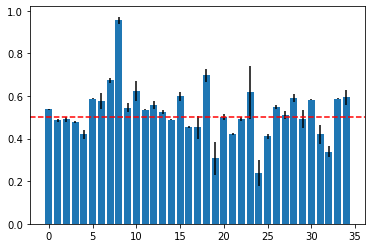

In [43]:
subM = results.groupby('sub_num').mean().score
subN = results.groupby('sub_num').sum().num_test_samples
subS = results.groupby('sub_num').std().score/np.sqrt(subN)

plt.bar(range(len(subM)),subM,yerr=subS)
plt.axhline(0.5,c='r',ls='--')

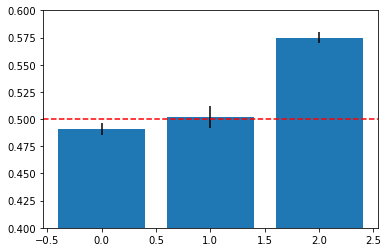

In [37]:
layerM = results.groupby('layer').mean().score
layerN = results.groupby('layer').sum().num_test_samples
layerS = results.groupby('layer').std().score/np.sqrt(layerN)

plt.bar(range(len(layerM)),layerM,yerr=layerS)
plt.ylim(0.4,0.6)
plt.axhline(0.5,c='r',ls='--')